Import agate.

In [36]:
import agate

We're importing our mountain lion data to add a column counting the data.

In [37]:
lions = agate.Table.from_csv('mountainlions.csv')

Print the table to see the column names.

In [38]:
print(lions)

|---------------+---------------|
|  column_names | column_types  |
|---------------+---------------|
|  ID           | Number        |
|  Cofirm Type  | Text          |
|  COUNTY       | Text          |
|  Date         | Date          |
|---------------+---------------|



Now, we'll group by the county name.

In [39]:
counties = lions.group_by('COUNTY')

And add a column with that count.

In [40]:
county_totals = counties.aggregate([
        ('count', agate.Length())
    ])

Sort by that count.

In [41]:
county_totals = county_totals.order_by('count', reverse=True)

Limit the data to the top 20 counties.

In [42]:
county_totals = county_totals.limit(20)

And export it to a new .csv

In [43]:
county_totals.to_csv('lions.csv')

Now we'll import the graphing libraries.

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="ticks")
%matplotlib inline

Import the data.

In [45]:
df = pd.read_csv('lions.csv')

Print the data.

In [46]:
print (df)

          COUNTY  count
0          Dawes    111
1          Sioux     52
2       Sheridan     37
3         Cherry     30
4   Scotts Bluff     26
5      Keya Paha     20
6          Brown     15
7           Rock     11
8        Lincoln     10
9         Custer      8
10          Knox      8
11        Banner      6
12        Thomas      5
13        Dawson      5
14        Nemaha      5
15     Box Butte      4
16        Howard      3
17        Dakota      3
18        Blaine      3
19       Buffalo      3


Let's graph it using one set of parameters.

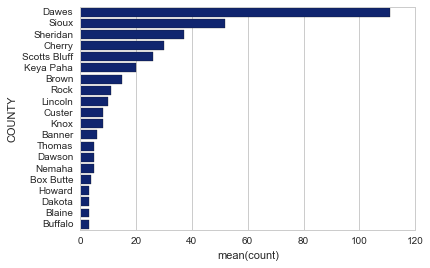

In [53]:
sns.set_style("whitegrid")
sns.barplot(x="count", y="COUNTY", data=df, color="b")

Now, we'll graph it using another set of parameters, this time using a dark grid and red bars.

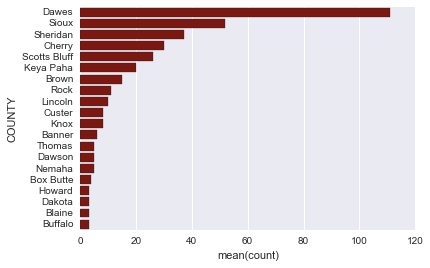

In [51]:
sns.set_style("darkgrid")
sns.barplot(x="count", y="COUNTY", data=df, color="r")

Now, we'll switch the style again, switch the axes, change the color to green, and remove the unnecessary spines.  

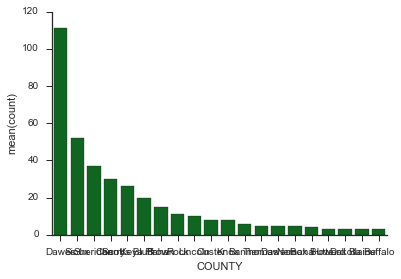

In [52]:
sns.set_style("ticks")
sns.barplot(x="COUNTY", y="count", data=df, color="g")
sns.despine()

Out of these three, I like the first one the most. The lines going through the graph help, since the longest line is furthest from the axis. I think the biggest weakness with all of the graphs is that it is limited to a fixed window. This causes the names to overlap in the third graph. 